In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os

In [7]:
os.chdir("C:\\Users\\falam\\Desktop\\Knight ML Assignment\\Knight ML Assignment\\Data")

In [8]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [9]:
train.shape,test.shape

((82657, 12), (20665, 11))

### Train columns

In [10]:
train.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

### test columns

In [11]:
test.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery'],
      dtype='object')

### Head of Train data

In [12]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


## EDA

### statistical description 

Using describe method from pandas. It will return us information about:

1.mean

2.standard deviation

3.minimum value

4.maximum value

5.25%,50%,75% quantille

In [13]:
train.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In our dataset only price is continous variable and we can also see on minimum and maximium value there is really high diverse in price feature.

There is wine which cost 3300 dollars , but we can see that 75 percent of wines are cheaper than 45 dollars.

### Duplicates.


First of all let's explore our data. On first look into data we can see that there are many duplicates, which we have to drop.

Let's see how many duplicates are in the data.

In [14]:
train.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

In [15]:
print("Total number of examples: ", train.shape[0])
print("Number of examples with the same title and description: ", train[train.duplicated(['review_description','review_title'])].shape[0])

Total number of examples:  82657
Number of examples with the same title and description:  5016


We can see that there are almost 5k records with the same title and description. 
We should drop rows columns in order to get proper result

In [16]:
train=train.drop_duplicates(['review_description','review_title'])
train=train.reset_index(drop=True)

In [17]:
train.shape

(77641, 12)

### Missing values.

Now, we will investigate our dataset in order to see how many missing values there is.

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77641 entries, 0 to 77640
Data columns (total 12 columns):
user_name             59105 non-null object
country               77608 non-null object
review_title          77641 non-null object
review_description    77641 non-null object
designation           55458 non-null object
points                77641 non-null int64
price                 72356 non-null float64
province              77608 non-null object
region_1              65680 non-null object
region_2              33814 non-null object
winery                77641 non-null object
variety               77641 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.1+ MB


We see that there is huge number of missing values. Let's see how many percent.

In [19]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train

,Total,Percent
region_2,43827,56.448268
designation,22183,28.571245
user_name,18536,23.873984
region_1,11961,15.405520
price,5285,6.806971
province,33,0.042503
country,33,0.042503
variety,0,0.000000
winery,0,0.000000
points,0,0.000000


The most missing values are in region, destination, user name and region, price columns.

Usefulness of other columns will be investigate on the Feature extraction stage. Maybe that NaN values are meaningful for particular columns..

In [20]:
train=train.dropna(subset=['price'])
train=train.reset_index(drop=True)

In [21]:
train.shape

(72356, 12)

### Let's take a quick look also on highest priced wines.

In [22]:
train[(train['price'] > 2200)]

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
53643,@vossroger,France,Château les Ormes Sorbet 2013 Médoc,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Château les Ormes Sorbet,Bordeaux-style Red Blend
56404,@vossroger,France,Château Pétrus 2014 Pomerol,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Château Pétrus,Bordeaux-style Red Blend


All two highest wine coming from France

### Data visualization

Visulaising the data to get better predictions. We also want to get better understanding what is in data and explore data in 'normal' way. This kind of approch can be useful if we have to do some feature engineering, where good data understanding can really help to produce better features.

The most common ways to visualize data are:

histograms

box plots

swarm plots

joint plot

heatmaps

Data can be visualized by matplotlib, seaborn library and built in methods from pandas dataframe

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def pastel_plot(data, x, y):
    plt.figure(figsize = (15,6))
    plt.title('Variety histogram - whole dataset')
    sns.set_color_codes("pastel")
    sns.barplot(x = x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()

In [24]:
train["variety"].value_counts()

Pinot Noir                    9610
Chardonnay                    8324
Cabernet Sauvignon            7093
Red Blend                     6373
Bordeaux-style Red Blend      3986
Riesling                      3720
Sauvignon Blanc               3612
Syrah                         3075
Rosé                          2386
Merlot                        2305
Zinfandel                     2087
Malbec                        1944
Nebbiolo                      1757
Sangiovese                    1751
Portuguese Red                1645
White Blend                   1643
Sparkling Blend               1522
Tempranillo                   1345
Rhône-style Red Blend         1053
Pinot Gris                    1020
Cabernet Franc                 989
Champagne Blend                922
Grüner Veltliner               829
Pinot Grigio                   778
Gewürztraminer                 744
Portuguese White               714
Gamay                          613
Bordeaux-style White Blend     516
Name: variety, dtype

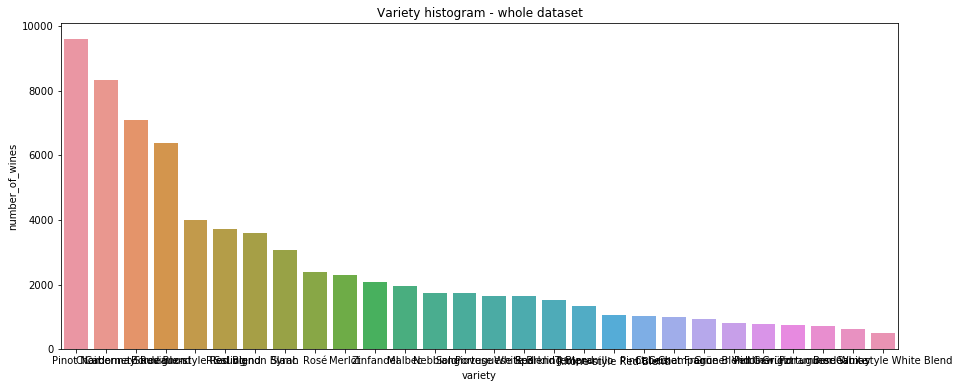

In [25]:
temp = train["variety"].value_counts()
df = pd.DataFrame({'variety': temp.index,
                   'number_of_wines': temp.values
                  })

pastel_plot(df,'variety', 'number_of_wines')

#### We can see that all wines have number of variety above Pinot Noir and Chardonnay. 

We can also get exact distribution not only the histogram. We will show it on price column

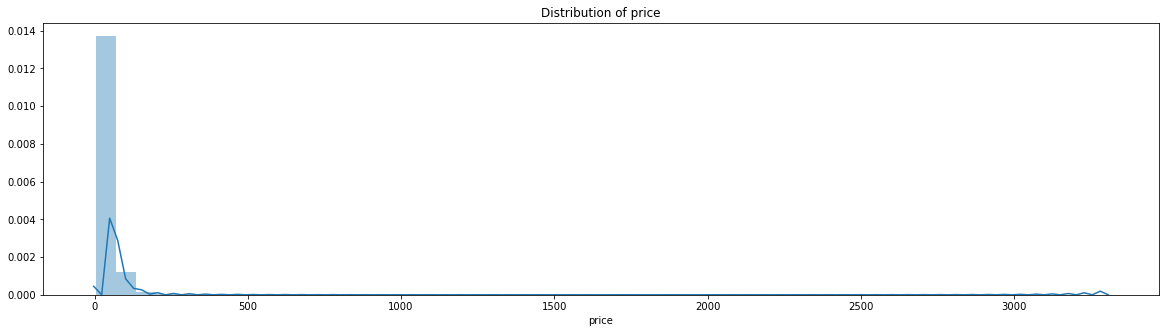

In [26]:
plt.figure(figsize=(20,5))
plt.title("Distribution of price")
ax = sns.distplot(train["price"])

We see that if we want to see better price distribution we have to scale our price or drop the tail. We will drop the tail, so the values that are above 200 dollars. We are also want to calculate how many wines are more expensive then 200 dolars.

There are : 0.659240422356128 % wines more expensive then 200 USD


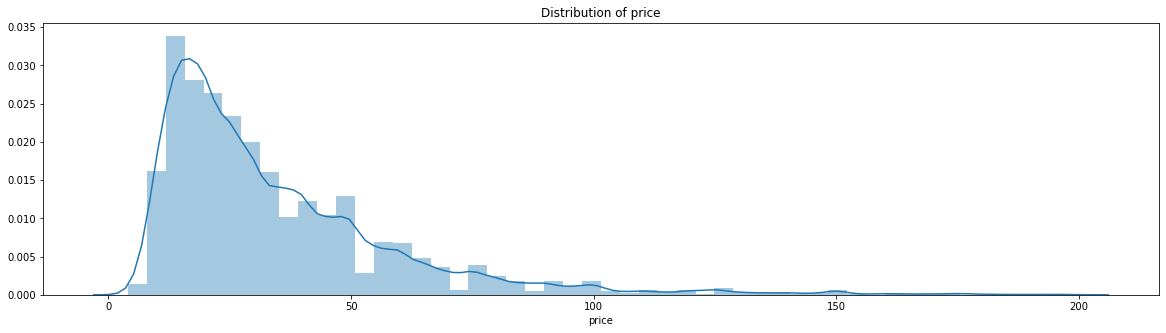

In [27]:
plt.figure(figsize=(20,5))
plt.title("Distribution of price")
ax = sns.distplot(train[train["price"]<200]['price'])

percent=train[train['price']>200].shape[0]/train.shape[0]*100
print("There are :", percent, "% wines more expensive then 200 USD")

#### As we can see we dropped only 0.59 percent of wines and now we can see that price distribution is also normal.




Let's investigate which country have most expensive and most high rated wines. First of all we will sort it by price and then plot.

In [28]:
z=train.groupby(['country'])['price','points'].mean().reset_index().sort_values('price',ascending=False)
z[['country','price']].head(n=10)

,country,price
33,Switzerland,94.750000
10,England,51.538462
18,Italy,46.738333
13,Germany,44.724688
11,France,44.122072
35,US,37.568786
29,Serbia,34.666667
5,Canada,33.470199
17,Israel,32.914676
2,Austria,31.970490


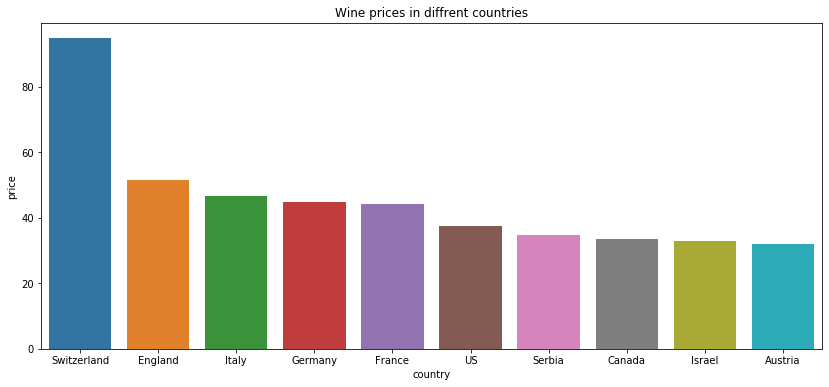

In [29]:
plt.figure(figsize = (14,6))
plt.title('Wine prices in diffrent countries')
sns.barplot(x = 'country', y="price", data=z.head(10))
locs, labels = plt.xticks()
plt.show()

In [30]:
z=z.sort_values('points', ascending=False)
z[['country','points']].head(10)

,country,points
10,England,91.538462
2,Austria,90.454058
13,Germany,90.045076
5,Canada,89.331126
18,Italy,89.051254
16,India,89.000000
24,Morocco,88.842105
11,France,88.771104
35,US,88.612594
17,Israel,88.511945


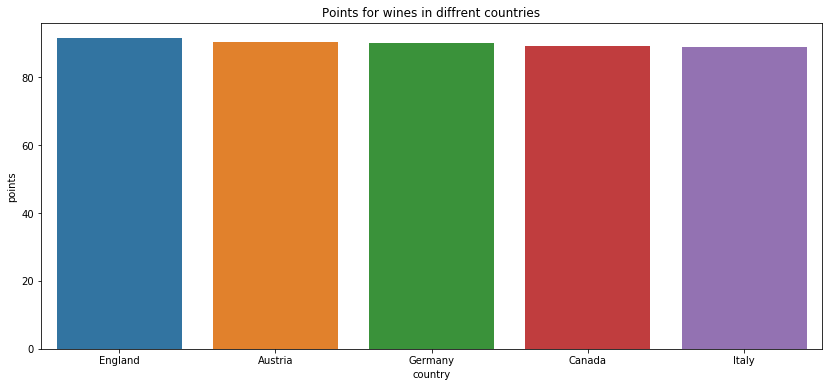

In [31]:
plt.figure(figsize = (14,6))
plt.title('Points for wines in diffrent countries')
sns.set_color_codes("pastel")
sns.barplot(x = 'country', y="points", data=z.head(5))
locs, labels = plt.xticks()
plt.show()

####  We can easily note, that the wines in Switzerland are the most expensive one. I think the most impactful factor is much higher prices for all goods in this country. The highest mean of points came to England Based on our data let's try make some guesses why England wines are the best.



#### England provide information only for thier best wines

They are simply the best :)


We can partly check our second guess. Let's see how many wines are in dataset from particular country.

US              36112
France          11870
Italy            7414
Chile            2708
Portugal         2642
Spain            2541
Argentina        2400
Austria          1491
Germany          1442
New Zealand      1004
Australia         958
South Africa      622
Israel            293
Canada            151
Greece            133
Bulgaria           91
Romania            69
England            52
Mexico             38
Moldova            34
Name: country, dtype: int64

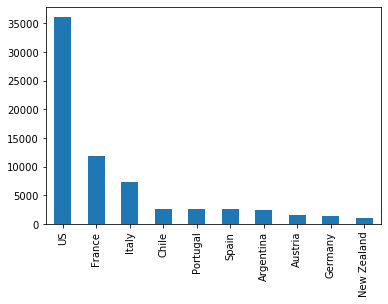

In [32]:
country=train['country'].value_counts()
country.head(10).plot.bar()
country.head(20)

#### We can see that England isn't even in first 20's, so our guess make more sense. ;)

To solve our 'problem' Important thing to investegate will be also price/quality factor.

In [33]:
z['quality/price']=z['points']/z['price']
z.sort_values('quality/price', ascending=False)[['country','quality/price']]

,country,quality/price
36,Ukraine,9.000000
16,India,7.416667
28,Romania,6.866051
12,Georgia,6.541096
26,Peru,5.954955
4,Bulgaria,5.787726
8,Cyprus,5.747253
21,Macedonia,5.716667
9,Czech Republic,5.630435
24,Morocco,4.994083


#####  Now we can Identifies that England was first on points ranking, but on points/quality ranking they are the second from the end. So, yeah, they provided information only for let's say 'premium' wines.

### LSTM Model on  Text(review_description) data

In [34]:
import os
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D, concatenate
from tensorflow.keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
# from tensorflow.keras.engine.topology import Layer
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers


from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.initializers import *
from tensorflow.keras.optimizers import *
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import *
import tensorflow as tf
import os
import time
import gc
import re
import glob
from tensorflow.keras.layers import Dense, Input,Activation, Conv1D,Embedding, Dropout
from keras.layers import CuDNNLSTM,CuDNNGRU

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\falam\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-a01c9dba2bc5>", line 10, in <module>
    from tensorflow.keras.preprocessing.text import Tokenizer
  File "c:\users\falam\appdata\local\programs\python\python36\lib\site-packages\tensorflow\__init__.py", line 101, in <module>
    from tensorflow_core import *
  File "c:\users\falam\appdata\local\programs\python\python36\lib\site-packages\tensorflow_core\__init__.py", line 40, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "c:\users\falam\appdata\local\programs\python\python36\lib\site-packages\tensorflow\__init__.py", line 50, in __getattr__
    module = self._load()
  File "c:\users\falam\appdata\local\programs\python\python36\lib\site-packages\tensorflow\__init__.py", line 44, in _load
    module

ImportError: Could not find the DLL(s) 'msvcp140_1.dll'. TensorFlow requires that these DLLs be installed in a directory that is named in your %PATH% environment variable. You may install these DLLs by downloading "Microsoft C++ Redistributable for Visual Studio 2015, 2017 and 2019" for your platform from this URL: https://support.microsoft.com/help/2977003/the-latest-supported-visual-c-downloads

In [35]:
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\falam\appdata\local\programs\python\python36\lib\site-packages\nltk\corpus\util.py", line 86, in __load
    root = nltk.data.find('{}/{}'.format(self.subdir, zip_name))
  File "c:\users\falam\appdata\local\programs\python\python36\lib\site-packages\nltk\data.py", line 701, in find
    raise LookupError(resource_not_found)
LookupError: 
**********************************************************************
  Resource stopwords not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('stopwords')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/stopwords.zip/stopwords/

  Searched in:
    - 'C:\\Users\\falam/nltk_data'
    - 'c:\\users\\falam\\appdata\\local\\programs\\python\\python36\\nltk_data'
    - 'c:\\users\\falam\\appdata\\local\\programs\\python\\python36\\share\\nltk_data'
    - 'c:\\users\\falam\\appdata\\local\\programs\\python\\pytho

TypeError: must be str, not list

In [ ]:
train.columns

In [ ]:
train = train.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
train['review_description'] = train['review_description'].apply(clean_text)

In [ ]:
train = train.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
test['review_description'] = test['review_description'].apply(clean_text)

In [ ]:
train['review_description'] = train['review_description'].str.replace('\d+', '')

In [ ]:
test['review_description'] = test['review_description'].str.replace('\d+', '')

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train['review_description'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

In [ ]:
X = tokenizer.texts_to_sequences(train['review_description'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

In [ ]:
test_X = tokenizer.texts_to_sequences(test['review_description'].values)
test_X = pad_sequences(test_X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', test_X.shape)

In [ ]:
Y = pd.get_dummies(train['variety']).values
print('Shape of label tensor:', Y.shape)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(28, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())


In [ ]:
epochs = 5
batch_size = 100

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [ ]:
Pred = model.predict_proba(X)[:,1]
Pred

In [ ]:
Pred2 = model.predict_proba(X)
Pred2

In [ ]:
test_Pred = model.predict_proba(test_X)[:,1]
test_Pred

### Adding Prediction Results on Data(Blending Model)

In [ ]:
train['LSTM_PRED1'] = Pred

In [ ]:
test['LSTM_PRED1']=test_Pred

In [ ]:
import gc
gc.collect(),gc.collect()

### Imputing Missing Value

In [36]:
train['user_name'] = np.where(train['user_name'].isna()==True,'@vossroger',train['user_name'])
train['country'] = np.where(train['country'].isna()==True,'US',train['country'])
train['designation'] = np.where(train['designation'].isna()==True,'Reserve',train['designation'])
train['region_1'] = np.where(train['region_1'].isna()==True,'Napa Valley',train['region_1'])
train['region_2'] = np.where(train['region_2'].isna()==True,'Central Coast',train['region_2'])
train['province'] = np.where(train['province'].isna()==True,'California',train['region_2'])

In [37]:
test['user_name'] = np.where(test['user_name'].isna()==True,'@vossroger',test['user_name'])
test['country'] = np.where(test['country'].isna()==True,'US',test['country'])
test['designation'] = np.where(test['designation'].isna()==True,'Reserve',test['designation'])
test['region_1'] = np.where(test['region_1'].isna()==True,'Napa Valley',test['region_1'])
test['region_2'] = np.where(test['region_2'].isna()==True,'Central Coast',test['region_2'])
test['province'] = np.where(test['province'].isna()==True,'California',test['region_2'])

### Encoding on categorical Data

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# train['user_name'] = le.fit(train['user_name'])
train['country'] = le.fit_transform(train['country'])
train['designation'] = le.fit_transform(train['designation'])
train['region_1'] =le.fit_transform(train['region_1'])
train['region_2'] = le.fit_transform(train['region_2'])
train['province'] =le.fit_transform(train['province'])
train['winery'] =le.fit_transform(train['winery'])
# train['variety'] =le.fit_transform(train['variety'])

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# test['user_name'] = le.fit(test['user_name'])
test['country'] = le.fit_transform(test['country'])
test['designation'] = le.fit_transform(test['designation'])
test['region_1'] =le.fit_transform(test['region_1'])
test['region_2'] = le.fit_transform(test['region_2'])
test['province'] =le.fit_transform(test['province'])
test['winery'] =le.fit_transform(test['winery'])
# test['variety'] =le.fit_transform(test['variety'])

### Random Forest

In [40]:
train.isna().sum()

user_name             0
country               0
review_title          0
review_description    0
designation           0
points                0
price                 0
province              0
region_1              0
region_2              0
winery                0
variety               0
dtype: int64

In [41]:
columns = ['user_name','review_title','review_description','variety']
X1 = train.drop(columns,axis=1)
Y1= pd.get_dummies(train['variety']).values

In [42]:
X1.shape

(72356, 8)

In [43]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1, test_size = 0.10, random_state = 42)
print(X_train1.shape,Y_train1.shape)
print(X_test1.shape,Y_test1.shape)

(65120, 8) (65120, 28)
(7236, 8) (7236, 28)


### Random Forest Model

In [44]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train1,Y_train1)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y_pred=clf.predict(X_test1)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(Y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.57      0.69       378
           1       0.88      0.53      0.66        57
           2       0.38      0.06      0.10       105
           3       0.68      0.39      0.50       712
           4       0.84      0.78      0.81        88
           5       0.69      0.29      0.41       860
           6       0.95      0.57      0.71        63
           7       0.35      0.17      0.23        53
           8       0.62      0.52      0.56        71
           9       0.64      0.37      0.47       183
          10       0.50      0.12      0.20       224
          11       1.00      0.87      0.93       169
          12       0.69      0.31      0.42        78
          13       0.56      0.25      0.34       125
          14       0.81      0.65      0.72       961
          15       0.74      0.74      0.74       145
          16       0.53      0.31      0.39        68
          17       0.79    

c:\users\falam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost

In [48]:
from sklearn.preprocessing import LabelEncoder
columns = ['user_name','review_title','review_description','variety']
x= train.drop(columns,axis=1)
y= train[['variety']]
le = LabelEncoder()
y = le.fit_transform(y['variety'])


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((54267, 8), (54267,), (18089, 8), (18089,))

In [49]:
X_train.columns

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'winery'],
      dtype='object')

In [50]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

In [51]:
params = {
    'max_depth': 3,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 28,
    'n_gpus': 0
}

In [52]:
bst = xgb.train(params, dtrain)

In [53]:
pred = bst.predict(dtest)

### Classification Report(Precision and Recall))

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, target_names=le.classes_))

                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.68      0.52      0.59       997
Bordeaux-style White Blend       0.88      0.43      0.58       129
            Cabernet Franc       0.78      0.03      0.05       247
        Cabernet Sauvignon       0.37      0.54      0.44      1773
           Champagne Blend       0.83      0.86      0.85       230
                Chardonnay       0.27      0.46      0.34      2081
                     Gamay       0.89      0.57      0.69       153
            Gewürztraminer       0.29      0.14      0.19       186
          Grüner Veltliner       0.50      0.88      0.64       207
                    Malbec       0.49      0.71      0.58       486
                    Merlot       0.00      0.00      0.00       576
                  Nebbiolo       0.99      0.86      0.92       439
              Pinot Grigio       0.64      0.13      0.21       195
                Pinot Gris       0.39      0.16

### Confusion Matrix

In [55]:
frog_cm = confusion_matrix(y_test, pred)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\falam\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-55-fea06399619e>", line 1, in <module>
    frog_cm = confusion_matrix(y_test, pred)
NameError: name 'confusion_matrix' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\falam\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\falam\appdata\local\programs\python\python36\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_get

NameError: name 'confusion_matrix' is not defined

In [56]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')

In [57]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(frog_cm, classes=le.classes_)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\falam\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-57-3aabb21a6316>", line 2, in <module>
    plot_confusion_matrix(frog_cm, classes=le.classes_)
NameError: name 'frog_cm' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\falam\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\falam\appdata\local\programs\python\python36\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_g

NameError: name 'frog_cm' is not defined

### Prediction on Test data

In [ ]:
test.columns

In [ ]:
columns = ['user_name','review_title','review_description']
test1 = test.drop(columns,axis=1)

In [ ]:
dtest1 = xgb.DMatrix(data=test1)

In [ ]:
pred = bst.predict(dtest1)

In [ ]:
test['Prediction_Result'] = pred

In [ ]:
test.head()

In [ ]:
test.to_csv("TestData_Pred_Results.csv")